## Preprocessing

In [58]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


#### Below is a summary table of all the runs done on the neural network with different settings for the dataframe and the neural network.

### The file initially has multiple runs based on the following settings as per the directions in the challenge assignment:


*  Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
*  Choose a cutoff value and create a list of application types to be replaced
*   For columns that have more than 10 unique values, determine the number of data points for each unique value.
*   Use the number of data points for each unique value to pick a cutoff point to bin "rare" categorical variables together in a new value, Other, and then check if the binning was successful.
*   Use pd.get_dummies() to encode categorical variables.
*   Split the preprocessed data into a features array, X, and a target array, y. Use these arrays and the train_test_split function to split the data into training and testing datasets.
*   Scale the training and testing features datasets by creating a StandardScaler instance, fitting it to the training data, then using the transform function.

### Please note that after the first 9 runs, it was determined that there were not enough input parameters in the network for obtaining test data accuracy score over 75%.

Two parameters were changed to the dataframe being trained on thus far:
*   The NAME column needed to be added back into the dataframe  
*   Creating more bins for rare occurrences in the application_name and classification columns.


### Taking this approach provided the desired test data accuracy at 79%


Model being saved at
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py





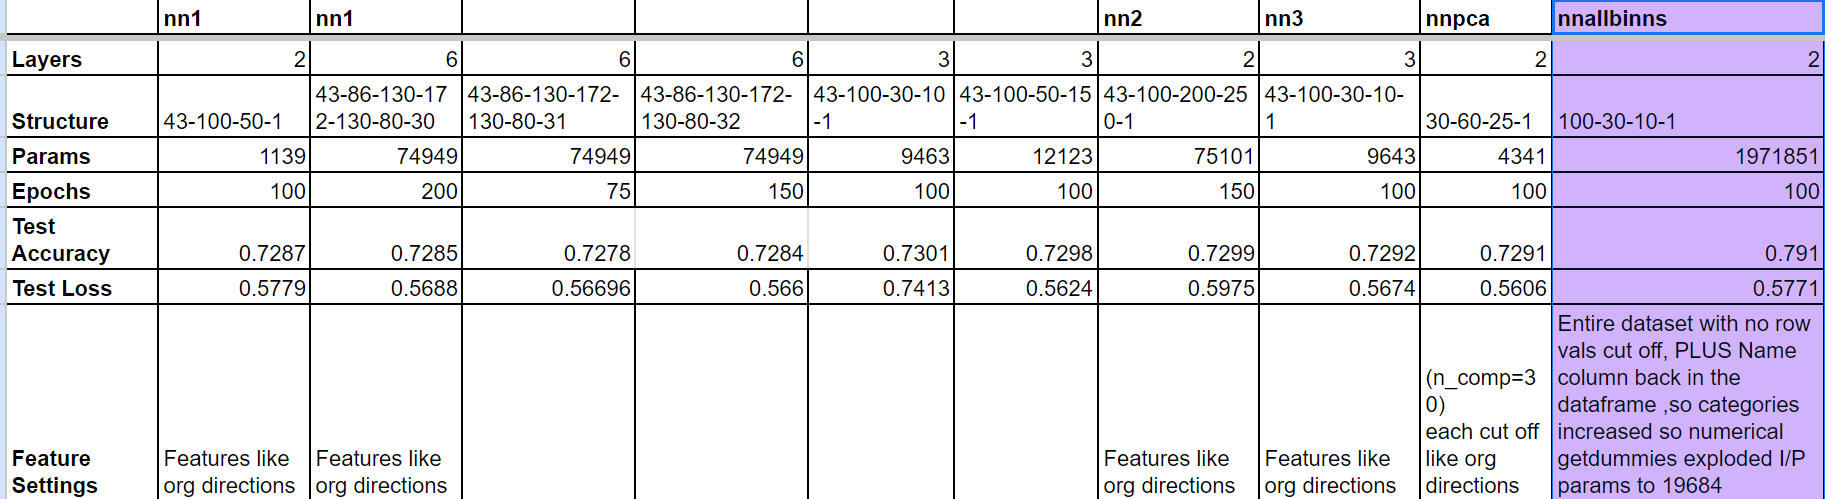

In [4]:
#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [6]:
application_df.shape

(34299, 12)

In [7]:
# Making a copy of the DataFrame for possible future test runs
application_df_copy = application_df.copy()

# Storing original application_type column for
app_type_4retest = application_df['APPLICATION_TYPE']

# Storing original application_type counts for possible future test runs
application_type_cnts_4retest = application_df['APPLICATION_TYPE'].value_counts()

# Storing original classification_type counts for possible future test runs
classification_type_cnts_4retest = application_df['CLASSIFICATION'].value_counts()

In [8]:
# Having a look at the columns of copied dataframe
application_df_copy.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [9]:
# Having a look at the copied dataframe
application_df_copy.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [10]:
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [11]:
# Dropping the non-beneficial ID columns, 'EIN' and 'NAME' as suggested by the assignment problem statement
application_df.drop(['NAME', 'EIN'], axis =1, inplace = True )
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [12]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [13]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

# Finding the counts of each application type
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()


# Choosing a cutoff value to match provided challenge directions
cutoff_value = 500

# Creating a list of application types to be replaced
application_types_to_replace = application_type_counts[application_type_counts < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [15]:
# Look at CLASSIFICATION value counts for binning
classification_counts =  application_df['CLASSIFICATION'].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [16]:
# It may be helpful to look at CLASSIFICATION value counts >1
classification_counts[classification_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [17]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

# Choosing a cutoff value
classification_cutoff_value = 1000

# Creating a list of application types to be replaced
classifications_to_replace = classification_counts[classification_counts < classification_cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [18]:
# Checking list of columns that have character type data
application_category = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
application_category

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [19]:
# Convert categorical data to numeric with `pd.get_dummies`
app_dummy_df = pd.get_dummies(application_df)
app_dummy_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
# Split our preprocessed data into our features and target arrays
# Separating the X variable, the features
X = app_dummy_df.drop('IS_SUCCESSFUL', axis = 1).values

# Separating the y variable, the labels
y = app_dummy_df['IS_SUCCESSFUL'].values

# Splitting the preprocessed data into a training and testing dataset
# Assigning a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=1,
                                                     stratify=y)

In [21]:
# Checking the number of features/columns in the training dataset
print(len(X_train[0]))

43


In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

(25724, 43) (8575, 43) (25724,) (8575,)


## Compile, Train and Evaluate the Model

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn1 = tf.keras.models.Sequential()

# Input layer
nn1.add(tf.keras.layers.Dense(units=100, activation="relu",input_dim = len(X_train[0])))

# First hidden layer
# nn1.add(tf.keras.layers.Dense(units=100, activation="relu"))

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=30, activation="sigmoid"))

# Third hidden layer
nn1.add(tf.keras.layers.Dense(units=10, activation="sigmoid"))

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn1.summary()

# Compile the model
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn1.fit(X_train_scaled, y_train, epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4400      
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 7751 (30.28 KB)
Trainable params: 7751 (30.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
804/804 [==============================] - 6s 3ms/step - loss: 0.5804 - accuracy: 0.7153
Epoch 2/100
804/804 [==============================

In [24]:
# Evaluate the model using the test data %%%%%% BEST ACCURACY AT 73% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5616 - accuracy: 0.7294 - 612ms/epoch - 2ms/step
Loss: 0.561602771282196, Accuracy: 0.7294460535049438


In [25]:
# Evaluate the model using the training data
model_loss, model_accuracy = nn1.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

804/804 - 1s - loss: 0.5304 - accuracy: 0.7409 - 1s/epoch - 2ms/step
Loss: 0.5304099321365356, Accuracy: 0.7408645749092102


In [26]:
# SECOND RUN
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn2 = tf.keras.models.Sequential()
# Input layer
nn2.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=43))
# First hidden layer
nn2.add(tf.keras.layers.Dense(units=200, activation="relu", input_dim=100))
# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=250, activation="relu", input_dim=200))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4400      
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 dense_6 (Dense)             (None, 250)               50250     
                                                                 
 dense_7 (Dense)             (None, 1)                 251       
                                                                 
Total params: 75101 (293.36 KB)
Trainable params: 75101 (293.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Train the model
fit_model = nn2.fit(X_train_scaled, y_train, epochs=150)

Epoch 1/150
804/804 [==============================] - 4s 3ms/step - loss: 0.5696 - accuracy: 0.7233
Epoch 2/150
804/804 [==============================] - 3s 3ms/step - loss: 0.5553 - accuracy: 0.7303
Epoch 3/150
804/804 [==============================] - 3s 3ms/step - loss: 0.5525 - accuracy: 0.7306
Epoch 4/150
804/804 [==============================] - 3s 3ms/step - loss: 0.5500 - accuracy: 0.7320
Epoch 5/150
804/804 [==============================] - 3s 3ms/step - loss: 0.5487 - accuracy: 0.7331
Epoch 6/150
804/804 [==============================] - 3s 3ms/step - loss: 0.5476 - accuracy: 0.7327
Epoch 7/150
804/804 [==============================] - 3s 3ms/step - loss: 0.5470 - accuracy: 0.7333
Epoch 8/150
804/804 [==============================] - 3s 4ms/step - loss: 0.5459 - accuracy: 0.7345
Epoch 9/150
804/804 [==============================] - 3s 4ms/step - loss: 0.5455 - accuracy: 0.7347
Epoch 10/150
804/804 [==============================] - 3s 4ms/step - loss: 0.5448 - accura

In [29]:
# Evaluate the model using the train data
model_loss, model_accuracy = nn2.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

804/804 - 1s - loss: 0.5288 - accuracy: 0.7419 - 1s/epoch - 2ms/step
Loss: 0.528782069683075, Accuracy: 0.7419141530990601


In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6289 - accuracy: 0.7306 - 469ms/epoch - 2ms/step
Loss: 0.6289438605308533, Accuracy: 0.7306122183799744


In [31]:
# THIRD RUN
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn3 = tf.keras.models.Sequential()
# Input layer
nn3.add(tf.keras.layers.Dense(units=43, activation="relu", input_dim=43))
# First hidden layer
nn3.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=43))
# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=100))
# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=10, activation="relu", input_dim=30))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 43)                1892      
                                                                 
 dense_9 (Dense)             (None, 100)               4400      
                                                                 
 dense_10 (Dense)            (None, 30)                3030      
                                                                 
 dense_11 (Dense)            (None, 10)                310       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9643 (37.67 KB)
Trainable params: 9643 (37.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Train the model
fit_model = nn3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5709 - accuracy: 0.7194
Epoch 2/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5544 - accuracy: 0.7290
Epoch 3/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5513 - accuracy: 0.7302
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5500 - accuracy: 0.7311
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5481 - accuracy: 0.7323
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5477 - accuracy: 0.7317
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5466 - accuracy: 0.7325
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5458 - accuracy: 0.7336
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5459 - accuracy: 0.7331
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5449 - accura

In [34]:
# Evaluate the model using the train data
model_loss, model_accuracy = nn3.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

804/804 - 1s - loss: 0.5312 - accuracy: 0.7414 - 1s/epoch - 2ms/step
Loss: 0.5312162041664124, Accuracy: 0.7414088249206543


In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5666 - accuracy: 0.7298 - 473ms/epoch - 2ms/step
Loss: 0.5666277408599854, Accuracy: 0.7297959327697754


##### Trying PCA to reduce input features to try for higher accuracy

In [37]:
# TRYING TO DROP SOME FEATUERS USING PCA(n_components = 30) METHOD

# Looking at the features df, which needs to be pruned through PCA
X

array([[       1,     5000,        0, ...,        0,        1,        0],
       [       1,   108590,        0, ...,        0,        1,        0],
       [       1,     5000,        0, ...,        0,        1,        0],
       ...,
       [       1,     5000,        0, ...,        0,        1,        0],
       [       1,     5000,        0, ...,        0,        1,        0],
       [       1, 36500179,        0, ...,        0,        1,        0]])

In [39]:
# TRYING TO DROP SOME FEATURES TO SEE IF IT AFFECTS THE ACCURACY

# Import the PCA module
from sklearn.decomposition import PCA
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=30)

application_pca_fit = pca.fit_transform(X)

application_pca_fit[:2]

array([[-2.76419868e+06,  7.71141548e-01,  1.51866582e+00,
        -2.65439088e-02, -4.15100125e-01,  6.96863552e-01,
        -1.16068633e-01, -9.99572431e-03, -1.32542713e-01,
         1.71191526e-01,  2.52800201e-01,  4.40302239e-02,
        -3.06383800e-02,  3.89935952e-02, -1.32031233e-01,
        -1.43939563e-01, -2.42329331e-02, -4.70788002e-02,
        -3.94834756e-01,  7.80583783e-02,  4.30209655e-01,
        -5.73377992e-01, -3.75099113e-01, -4.47251286e-01,
        -7.40920804e-02, -4.33196640e-03,  9.84426070e-02,
         1.79005954e-02, -2.17612986e-02, -7.01714957e-04],
       [-2.66060868e+06, -4.88113355e-01, -6.92200249e-02,
         7.86820598e-01,  5.13450132e-01,  5.46216643e-01,
        -7.52827780e-01,  5.45231881e-02, -1.28716207e-01,
        -1.34494199e-01,  1.09848745e-01, -3.16567174e-01,
         6.32093345e-01, -1.41203280e-02,  5.13049266e-02,
        -1.48514170e-01,  6.10260442e-01,  1.07476629e+00,
        -9.80908007e-02, -4.08134784e-01, -3.87789365e-

In [40]:
# look at the explained var ratio
pca.explained_variance_ratio_

array([1.00000000e+00, 1.05001916e-16, 5.60782810e-17, 3.89449562e-17,
       3.07005018e-17, 2.97277204e-17, 2.00904314e-17, 1.36116477e-17,
       1.19218600e-17, 7.83690368e-18, 6.89662539e-18, 5.65692085e-18,
       5.30660174e-18, 4.88256087e-18, 3.80146425e-18, 3.29480757e-18,
       3.15194766e-18, 2.90504470e-18, 2.55446312e-18, 2.28034964e-18,
       2.22532995e-18, 1.72784704e-18, 1.21351179e-18, 1.09072573e-18,
       8.35527479e-19, 7.66637940e-19, 6.64849768e-19, 4.22770143e-19,
       3.71585997e-19, 2.17185886e-19])

In [41]:
# Create the PCA DataFrame
application_pca_fit_df = pd.DataFrame(
    application_pca_fit,
    columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10", "PCA11", "PCA12", "PCA13", "PCA14",
             "PCA15", "PCA16", "PCA17", "PCA18", "PCA19", "PCA20", "PCA21", "PCA22", "PCA23", "PCA24", "PCA25", "PCA26", "PCA27",
             "PCA28", "PCA29", "PCA30"]
)

# Review the PCA DataFrame
application_pca_fit_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA21,PCA22,PCA23,PCA24,PCA25,PCA26,PCA27,PCA28,PCA29,PCA30
0,-2.764199e+06,0.771142,1.518666,-0.026544,-0.415100,0.696864,-0.116069,-0.009996,-0.132543,0.171192,...,0.430210,-0.573378,-0.375099,-0.447251,-0.074092,-0.004332,0.098443,0.017901,-0.021761,-0.000702
1,-2.660609e+06,-0.488113,-0.069220,0.786821,0.513450,0.546217,-0.752828,0.054523,-0.128716,-0.134494,...,-0.038779,0.182896,0.165580,-0.216809,-0.365762,0.026200,0.029228,-0.000402,0.005477,-0.047476
2,-2.764199e+06,1.904694,0.703090,0.634303,-0.096650,-0.066975,0.324304,0.040126,0.396111,-0.468182,...,-0.025555,0.011076,0.006285,0.016634,0.005530,-0.000378,-0.009594,0.000750,0.002592,0.001154
3,-2.762507e+06,0.002907,-0.763175,0.487983,0.620275,-0.770869,-0.519564,0.057210,-0.171484,-0.025171,...,-0.076351,-0.002288,0.088446,-0.114621,0.017586,-0.045803,-0.021627,-0.021998,0.017863,0.004497
4,-2.626609e+06,-0.833628,0.828997,-0.095619,0.543422,-0.204304,0.082417,0.746656,-0.103676,0.039237,...,0.482246,-0.051032,-0.311495,0.096195,-0.290770,0.147189,-0.723839,-0.249127,0.540303,-0.020274


In [44]:
# putting PCA df through NN through next few steps

X_pca = application_pca_fit_df

# Splitting the preprocessed data into a training and testing dataset
# Assigning a random_state of 1 to the function
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca,
                                                    y,
                                                    random_state=1,
                                                    stratify=y)

In [45]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_pca_scaler = scaler.fit(X_pca_train)

# Scale the data
X_pca_train_scaled = X_pca_scaler.transform(X_pca_train)
X_pca_test_scaled = X_pca_scaler.transform(X_pca_test)

print(X_pca_train_scaled.shape, X_pca_test_scaled.shape, y_train.shape, y_test.shape)

(25724, 30) (8575, 30) (25724,) (8575,)


In [46]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_pca = tf.keras.models.Sequential()
# Input layer
nn_pca.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=30))
# First hidden layer
nn_pca.add(tf.keras.layers.Dense(units=60, activation="relu", input_dim=30))
# Second hidden layer
nn_pca.add(tf.keras.layers.Dense(units=25, activation="relu", input_dim=60))
# Output layer
nn_pca.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn_pca.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 30)                930       
                                                                 
 dense_14 (Dense)            (None, 60)                1860      
                                                                 
 dense_15 (Dense)            (None, 25)                1525      
                                                                 
 dense_16 (Dense)            (None, 1)                 26        
                                                                 
Total params: 4341 (16.96 KB)
Trainable params: 4341 (16.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# Compile the model
nn_pca.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [48]:
# Train the model
fit_model = nn_pca.fit(X_pca_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.5785 - accuracy: 0.7126
Epoch 2/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5543 - accuracy: 0.7308
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5522 - accuracy: 0.7304
Epoch 4/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5500 - accuracy: 0.7328
Epoch 5/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5489 - accuracy: 0.7320
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5473 - accuracy: 0.7332
Epoch 7/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5470 - accuracy: 0.7333
Epoch 8/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5464 - accuracy: 0.7323
Epoch 9/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5451 - accuracy: 0.7330
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5453 - accura

In [49]:
# Evaluate the model using the training data
model_loss, model_accuracy = nn_pca.evaluate(X_pca_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

804/804 - 1s - loss: 0.5308 - accuracy: 0.7415 - 1s/epoch - 2ms/step
Loss: 0.5307738184928894, Accuracy: 0.7414865493774414


In [50]:
# Evaluate the model using the testing data
model_loss, model_accuracy = nn_pca.evaluate(X_pca_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5649 - accuracy: 0.7285 - 442ms/epoch - 2ms/step
Loss: 0.56490558385849, Accuracy: 0.7285131216049194


In [51]:
#  USING PCA ON INPUT FEATURES DIDN'T SEEM TO MATTER MUCH. ACCURACY HAS DROPPED AND SO WILL TRY OTHER METHODS

###  TRYING NEW METHOD OF MODEL OPTIMIZATION
### Creating more bins for rare occurrences in columns.

In [66]:
# Viewing the copied dataframe
print(application_df_copy.shape)
application_df_copy.head()

(34299, 12)


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [67]:
application_df_copy.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [ ]:
# This time keeping the Name column and dropping only EIN column from original dataset
application_df_copy.drop('EIN', axis =1, inplace = True )


In [70]:
application_df_copy.columns

Index(['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [72]:
# Convert categorical data to numeric with `pd.get_dummies`
app_dummy_all_bins_df = pd.get_dummies(application_df_copy)
app_dummy_all_bins_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [73]:
# Split our preprocessed data into our features and target arrays
# Separating the y variable, the labels
y_all_bins = app_dummy_all_bins_df['IS_SUCCESSFUL'].values

# Separating the X variable, the features
X_all_bins = app_dummy_all_bins_df.drop('IS_SUCCESSFUL', axis = 1).values

# Splitting the preprocessed data into a training and testing dataset
# Assigning a random_state of 1 to the function
X_all_bins_train, X_all_bins_test, y_all_bins_train, y_all_bins_test = train_test_split(X_all_bins,
                                                    y_all_bins,
                                                    random_state=1,
                                                    stratify=y_all_bins)

In [74]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_all_bins_scaler = scaler.fit(X_all_bins_train)

# Scale the data
X_all_bins_train_scaled = X_all_bins_scaler.transform(X_all_bins_train)
X_all_bins_test_scaled = X_all_bins_scaler.transform(X_all_bins_test)

print(X_all_bins_train_scaled.shape, X_all_bins_test_scaled.shape, y_all_bins_train.shape, y_all_bins_test.shape)

(25724, 19684) (8575, 19684) (25724,) (8575,)


## Compile, Train and Evaluate the Model with more bins for rare occurances in columns.

In [75]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_all_bins = tf.keras.models.Sequential()

# Input layer
nn_all_bins.add(tf.keras.layers.Dense(units=100, activation="relu",input_dim = len(X_all_bins_train_scaled[0])))

# Second hidden layer
nn_all_bins.add(tf.keras.layers.Dense(units=30, activation="sigmoid"))

# Third hidden layer
nn_all_bins.add(tf.keras.layers.Dense(units=10, activation="sigmoid"))

# Output layer
nn_all_bins.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_all_bins.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               1968500   
                                                                 
 dense_18 (Dense)            (None, 30)                3030      
                                                                 
 dense_19 (Dense)            (None, 10)                310       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1971851 (7.52 MB)
Trainable params: 1971851 (7.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
# Compile the model
nn_all_bins.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [77]:
# Train the model
fit_model = nn_all_bins.fit(X_all_bins_train_scaled, y_all_bins_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 5s 4ms/step - loss: 0.5244 - accuracy: 0.7601
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.2196 - accuracy: 0.9266
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.1277 - accuracy: 0.9565
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.1042 - accuracy: 0.9619
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0986 - accuracy: 0.9620
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0954 - accuracy: 0.9621
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0935 - accuracy: 0.9619
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0918 - accuracy: 0.9630
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0905 - accuracy: 0.9627
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0911 - accura

In [78]:
# Evaluate the model using the training data
model_loss, model_accuracy = nn_all_bins.evaluate(X_all_bins_train_scaled,y_all_bins_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

804/804 - 2s - loss: 0.1127 - accuracy: 0.9560 - 2s/epoch - 2ms/step
Loss: 0.11269859969615936, Accuracy: 0.9559944272041321


In [79]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_all_bins.evaluate(X_all_bins_test_scaled,y_all_bins_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5771 - accuracy: 0.7910 - 638ms/epoch - 2ms/step
Loss: 0.5771476626396179, Accuracy: 0.791020393371582


In [80]:
# Export our model to HDF5 file
nn_all_bins.save('AlphabetSoupCharity.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
